In [1]:
import tensorflow as tf 
from tensorflow.keras import  models , layers 
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 10

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory( 
    "./defect_data/" , 
    shuffle = True , 
    batch_size = BATCH_SIZE ,
    image_size = (IMAGE_SIZE , IMAGE_SIZE)
)

Found 5 files belonging to 3 classes.


2022-09-02 18:40:32.371914: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error


In [4]:
class_names = dataset.class_names 
class_names

['Cuts', 'Flashes', 'Good']

In [5]:
len(dataset)

1

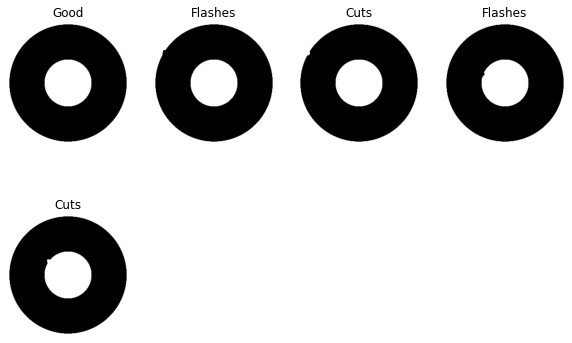

In [8]:
plt.figure(figsize = (10 , 10))
for image_batch , label_batch in dataset.take(1):
    for i in range(5):
        plt.subplot(3 , 4 , i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8")) 
        # print(image_batch.shape) 
        # print(label_batch.numpy())
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [9]:
train_size = 0.8
len(dataset)*train_size

0.8

In [18]:
train_ds = dataset.take(8)   # first 54 images
len(train_ds)

1

In [19]:
test_ds = dataset.skip(8) # skip 54 images
len(test_ds)

0

In [20]:
val_size = 0.1 
len(dataset)*val_size

0.1

In [21]:
val_ds = test_ds.take(1) 
len(val_ds)

0

In [22]:
test_ds = test_ds.skip(1) 
len(test_ds)

0

In [23]:
def get_dataset_partitions_tf(ds , train_split=0.8 , val_split=0.1 , test_split=0.1 , shuffle =True , shuffle_size=100000 ): 
    ds_size = len(ds) 
    if shuffle: 
        ds = ds.shuffle(shuffle_size , seed=12)

    train_size = int(ds_size*train_split)
    val_size = int(ds_size*val_split)

    train_ds = ds.take(train_size) 
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds , val_ds , test_ds

In [ ]:
train_ds , val_ds , test_ds =get_dataset_partitions_tf(dataset)

In [24]:
len(train_ds) , len(val_ds) , len(test_ds)

(1, 0, 0)

In [25]:
train_ds = train_ds.cache().shuffle(1000).prefetch(tf.data.experimental.AUTOTUNE) 
val_ds = val_ds.cache().shuffle(1000).prefetch(tf.data.experimental.AUTOTUNE) 
test_ds = test_ds.cache().shuffle(1000).prefetch(tf.data.experimental.AUTOTUNE)

In [26]:
resize_and_rescale = tf.keras.Sequential([ 
    layers.experimental.preprocessing.Rescaling(IMAGE_SIZE , IMAGE_SIZE) ,
    layers.experimental.preprocessing.Rescaling(1./255) ,
])

In [27]:
data_augmentation = tf.keras.Sequential([ 
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical") ,
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [28]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [29]:
model.build(input_shape = input_shape)

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [31]:
model.compile( 
    optimizer="adam", 
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
    metrics = ["accuracy"] 
)

In [35]:
history = model.fit( 
    train_ds ,
    validation_data = val_ds , 
    epochs = EPOCHS , 
    batch_size = BATCH_SIZE ,
    verbose = 1, 
)

Epoch 1/10
1/1 [==============================] - 0s 165ms/step - loss: 1.3391 - accuracy: 0.4000
Epoch 2/10
1/1 [==============================] - 0s 155ms/step - loss: 1.5030 - accuracy: 0.4000
Epoch 3/10
1/1 [==============================] - 0s 157ms/step - loss: 1.2037 - accuracy: 0.4000
Epoch 4/10
1/1 [==============================] - 0s 157ms/step - loss: 1.1451 - accuracy: 0.4000
Epoch 5/10
1/1 [==============================] - 0s 165ms/step - loss: 1.2017 - accuracy: 0.4000
Epoch 6/10
1/1 [==============================] - 0s 179ms/step - loss: 1.0703 - accuracy: 0.6000
Epoch 7/10
1/1 [==============================] - 0s 165ms/step - loss: 1.1138 - accuracy: 0.4000
Epoch 8/10
1/1 [==============================] - 0s 164ms/step - loss: 1.0622 - accuracy: 0.4000
Epoch 9/10
1/1 [==============================] - 0s 165ms/step - loss: 0.9968 - accuracy: 0.4000
Epoch 10/10
1/1 [==============================] - 0s 194ms/step - loss: 1.0116 - accuracy: 0.4000


In [37]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 1}

In [38]:
# save model 
model.save("machine_model.h5")

In [39]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

In [40]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

In [41]:
history.history['loss'][:5] # show loss for first 5 epochs

[1.3390583992004395,
 1.5029882192611694,
 1.2036750316619873,
 1.1450529098510742,
 1.2017498016357422]

In [43]:
acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']

loss = history.history['loss']
# val_loss = history.history['val_loss']

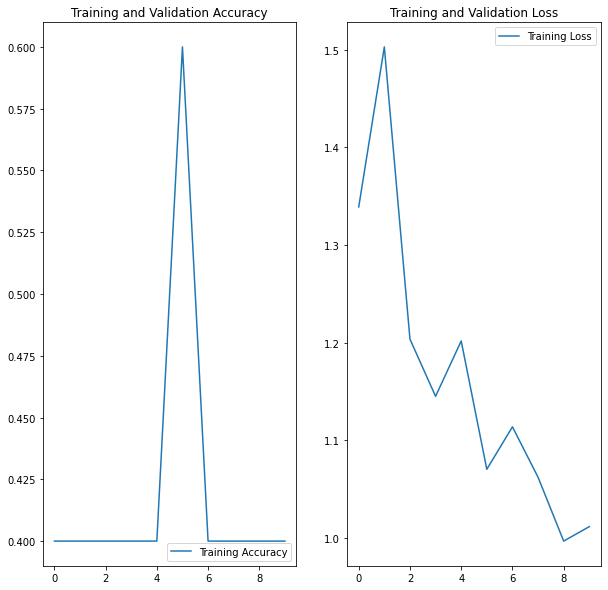

In [45]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
# plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
# plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [46]:
import numpy as np 
for images_batch , labels_batch in test_ds.take(1): 
    first_image = images_batch[0].numpy().astype('uint8') 
    first_label = labels_batch[0].numpy() 

    print('first image to predict') 
    plt.imshow(first_image) 
    print('actual label : ' , class_names[first_label]) 

    batch_prediction = model.predict(images_batch) 
    print('predicted label : ' , class_names[np.argmax(batch_prediction[0])])

In [47]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [48]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")


<Figure size 1080x1080 with 0 Axes>

## Canny Edge Approach

In [1]:
import os
import cv2
import numpy as np


################################
# --- Variables ---
################################
IMAGE_SIZE = (500, 500)

# -- Threshold Details --
# *THRESHOLD_VALUE need to INCREASED if no contour detected,
# *if there're INACCURATE CONTOUR NUMBERS the value need to DECREASED
THRESHOLD_VALUE = 110
MAX_VALUE = 255

# -- Invert Threshold Details --
INV_THRESHOLD_VALUE = 50
INV_MAX_VALUE = 255

# -- Canny Details --
THRESHOLD1 = 100
THRESHOLD2 = 70

# --contour properties--
CON_COLOR = (0, 0, 255)
CON_THICKNESS = 1

# -- Image Stack properties--
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
GREEN = (0, 255, 0)
RED = (0, 0, 255)
STACK_IMG_SIZE = (200, 200)

################################

while True:
    files = os.listdir('C:/Users/Harish/Videos/Images/')
    print("======================================")
    print("=         Available Images           =")
    print("======================================")
    for i in files:
        print('-> {}\t '.format(i), end='')
        if files.index(i) % 3 == 0 and files.index(i) != 0:
            print('\n')
    print("\n======================================")

    # need to select image name with the extension (ex: img1.jpeg)
    file = input("Select a file from the directory(q- quit): ").strip()

    # quit program
    if file == 'q' or file == 'Q':
        break

    PATH = 'C:/Users/Harish/Videos/Images/' + file
    # Image Path
    imageOri = cv2.imread(PATH)

    try:
        # converts to grayscale
        image = cv2.cvtColor(imageOri, cv2.COLOR_BGR2GRAY)
    except:
        print("Invalid Input! Please select correct file(ex: 'imgSample.jpg')")
    else:
        # resize image
        image = cv2.resize(image, IMAGE_SIZE)
        imageOri = cv2.resize(imageOri, IMAGE_SIZE)
        image = cv2.GaussianBlur(image, (3, 3), 0)

        # Threshold the image so that your black markings are black on a white background.
        ret, thresh_basic = cv2.threshold(image, THRESHOLD_VALUE, MAX_VALUE, cv2.THRESH_BINARY)

        # show thresholded image - DEBUGGING
        cv2.imshow("Thresh basic", thresh_basic)

        #thresh_addapt = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)
        # cv2.imshow("Thresh Adapt", thresh_addapt)

        # Taking a matrix of size 5 as the kernel
        kernel = np.ones((5, 5), np.uint8)

        # Morphological operations-Erodes away the boundaries of foreground object
        # Use morphology to clean up extraneous markings.
        img_erosion = cv2.erode(thresh_basic, kernel, iterations=1)

        #####################
        # The invert the thresholded image,
        # so that the black markings are white on a black background and then find the external contours of those.
        ret, thresh_inv = cv2.threshold(img_erosion, INV_THRESHOLD_VALUE, INV_MAX_VALUE, cv2.THRESH_BINARY_INV)
        # show inverted threshold image - DEBUGGING
        #cv2.imshow("INV", thresh_inv)


        #####################
        
        # Find Canny edges
        edged = cv2.Canny(img_erosion, THRESHOLD1, THRESHOLD2)
        # show canny edges - DEBUGGING
        #cv2.imshow('Canny', edged)
        #cv2.waitKey(0)

        # Find Contours
        # findContours alters the image
        contours, hierarchy = cv2.findContours(thresh_inv, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

        # ++++++++++++++++++
        # -- Image Stack  --
        # ++++++++++++++++++
        font = cv2.FONT_HERSHEY_SIMPLEX

        imageRz = cv2.resize(image, STACK_IMG_SIZE)
        thresh_basicRz = cv2.resize(thresh_basic, STACK_IMG_SIZE)
        img_erosionRz = cv2.resize(img_erosion, STACK_IMG_SIZE)
        thresh_invRz = cv2.resize(thresh_inv, STACK_IMG_SIZE)
        edgedRz = cv2.resize(edged, STACK_IMG_SIZE)

        imageRz = cv2.putText(imageRz, 'GrayScale', (5, 15), font, 0.5, WHITE, 1, cv2.LINE_AA)
        thresh_basicRz = cv2.putText(thresh_basicRz, 'ThresholdBasic', (5, 15), font,
                                     0.5, WHITE, 1,cv2.LINE_AA)
        img_erosionRz = cv2.putText(img_erosionRz, 'Morphology-Erosion', (5, 15), font,
                                    0.5, WHITE, 1, cv2.LINE_AA)
        thresh_invRz = cv2.putText(thresh_invRz, 'Threshold-mode INV', (5, 15), font,
                                   0.5, BLACK, 1, cv2.LINE_AA)
        edgedRz = cv2.putText(edgedRz, 'Canny Edges', (5, 15), font, 0.5, WHITE, 1, cv2.LINE_AA)
        
        numpy_horizontal_concat = np.concatenate((imageRz, thresh_basicRz, img_erosionRz,
                                                  thresh_invRz, edgedRz), axis=1)

        cv2.imshow('Filtering...', numpy_horizontal_concat)

        # +++++++

        # get total contours
        num_of_con = str(len(contours) - 1)
        print("Number of Contours found = " + num_of_con)
        if len(contours) > 1:
            print('======================================')
            print('=       MARKINGS DETECTED            =')
            print('======================================\n\n')

        # show original img
        cv2.imshow('Original Image', imageOri)
        # draw contours on original img
        if int(num_of_con) != 0:
            for i in range(int(num_of_con)):
                highlighted_img = cv2.drawContours(imageOri, contours, i, CON_COLOR, CON_THICKNESS)

            highlighted_img = cv2.putText(highlighted_img, 'Approximately {} defect(s) detected'.
                                          format(num_of_con), (5, 15),
                                          font, 0.5, GREEN, 1, cv2.LINE_AA)
        else:
            highlighted_img = cv2.putText(imageOri, 'Unable to detect defects!',
                                          (5, 15), font, 0.5, RED, 2, cv2.LINE_AA)
            
        # show markings highlighted img
        cv2.imshow('Highlighted Defect', highlighted_img)
        # save image containing highlighted defect
        cv2.imwrite('Output Images/{}_DEFECTS_HIGHLIGHTED.jpg'.format(file.split('.')[0]), highlighted_img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

=         Available Images           =
-> defect1.png	 -> defect2.png	 -> defect3.png	 -> defect4.png	 

-> good.png	 
Number of Contours found = 0


### Getting Pixels Sums to Identify Defects

In [1]:
import numpy as np

from matplotlib import pyplot as plt
out = plt.imread('C:/Users/Harish/Videos/Images/good.png')
c = out.flatten()
np.sum(c)

2703958.8

In [2]:
out1 = plt.imread('C:/Users/Harish/Videos/Images/defect1.png')
d = out1.flatten()
np.sum(d)

2702887.0

In [3]:
out2 = plt.imread('C:/Users/Harish/Videos/Images/defect2.png')
e = out2.flatten()
np.sum(e)

2705193.0

##### From the Output, we can able to say, the Cuts image having more sum value because the white background is taken as 1, similarly for flash it contains less value than other. From these, we can able to classify the defects.